In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
pokemon_path = "all_pokemon_data.csv"
pokemon_db = pd.read_csv(pokemon_path)
pokemon_db.head()

,Name,National Dex #,Primary Typing,Secondary Typing,Secondary Typing Flag,Generation,Legendary Status,Form,Alt Form Flag,Evolution Stage,...,Weight (hg),Height (in),Weight (lbs),Base Stat Total,Health,Attack,Defense,Special Attack,Special Defense,Speed
0,bulbasaur,1,grass,poison,True,generation-i,False,Base,False,1,...,69,28,15,318,45,49,49,65,65,45
1,ivysaur,2,grass,poison,True,generation-i,False,Base,False,2,...,130,39,29,405,60,62,63,80,80,60
2,venusaur,3,grass,poison,True,generation-i,False,Base,False,3,...,1000,79,220,525,80,82,83,100,100,80
3,venusaur-mega,3,grass,poison,True,generation-i,True,Mega,True,3,...,1555,94,343,625,80,100,123,122,120,80
4,charmander,4,fire,NaN,False,generation-i,False,Base,False,1,...,85,24,19,309,39,52,43,60,50,65


In [3]:
pokemon_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Name                   1184 non-null   object
 1   National Dex #         1184 non-null   int64 
 2   Primary Typing         1184 non-null   object
 3   Secondary Typing       654 non-null    object
 4   Secondary Typing Flag  1184 non-null   bool  
 5   Generation             1184 non-null   object
 6   Legendary Status       1184 non-null   bool  
 7   Form                   1184 non-null   object
 8   Alt Form Flag          1184 non-null   bool  
 9   Evolution Stage        1184 non-null   int64 
 10  Number of Evolution    1184 non-null   int64 
 11  Color ID               1184 non-null   object
 12  Catch Rate             1184 non-null   int64 
 13  Height (dm)            1184 non-null   int64 
 14  Weight (hg)            1184 non-null   int64 
 15  Height (in)          

In [4]:
pokemon_db.isnull().sum()


Name                       0
National Dex #             0
Primary Typing             0
Secondary Typing         530
Secondary Typing Flag      0
Generation                 0
Legendary Status           0
Form                       0
Alt Form Flag              0
Evolution Stage            0
Number of Evolution        0
Color ID                   0
Catch Rate                 0
Height (dm)                0
Weight (hg)                0
Height (in)                0
Weight (lbs)               0
Base Stat Total            0
Health                     0
Attack                     0
Defense                    0
Special Attack             0
Special Defense            0
Speed                      0
dtype: int64

In [5]:
pokemon_db.shape

(1184, 24)

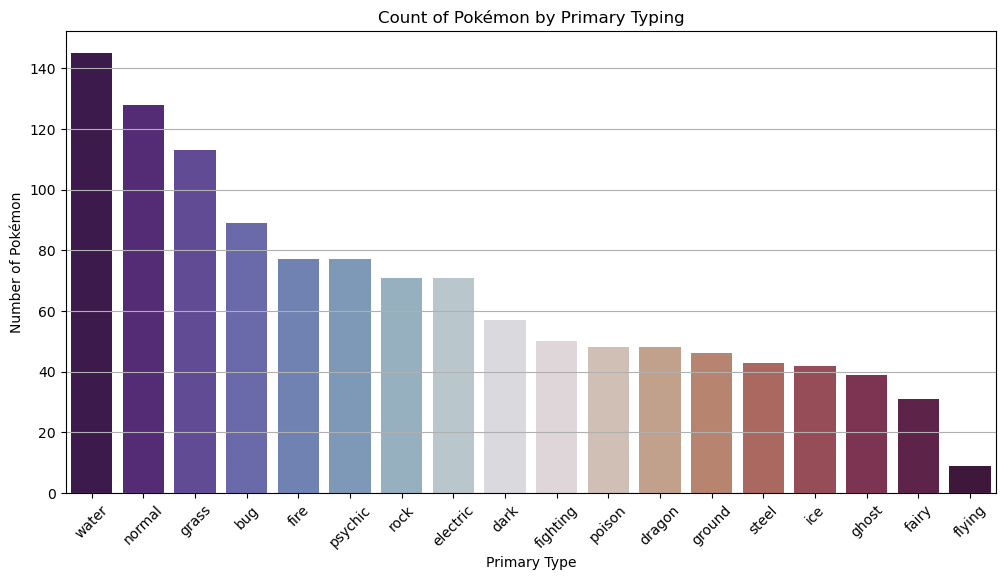

In [6]:
plt.figure(figsize=(12, 6))
type_counts = pokemon_db['Primary Typing'].value_counts()
sb.barplot(x=type_counts.index, y=type_counts.values, palette='twilight_shifted')
plt.title('Count of Pokémon by Primary Typing')
plt.xlabel('Primary Type')
plt.ylabel('Number of Pokémon')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [7]:
pokemon_db['Secondary Typing'] = pokemon_db['Secondary Typing'].fillna('No Secondary')

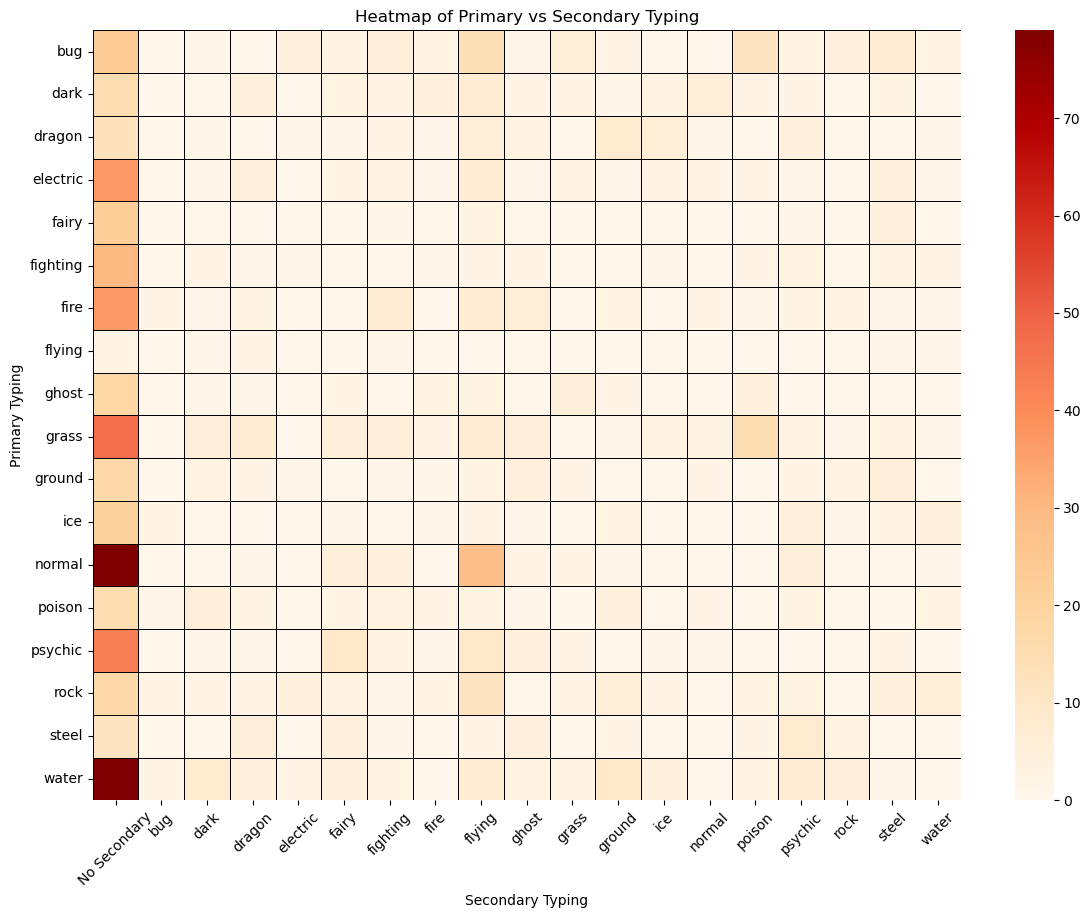

In [10]:
type_combo = pd.crosstab(pokemon_db['Primary Typing'], pokemon_db['Secondary Typing'])
plt.figure(figsize=(14, 10))
sb.heatmap(type_combo, cmap='OrRd', linewidths=0.5, linecolor='black')
plt.title('Heatmap of Primary vs Secondary Typing')
plt.xlabel('Secondary Typing')
plt.ylabel('Primary Typing')
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.show()

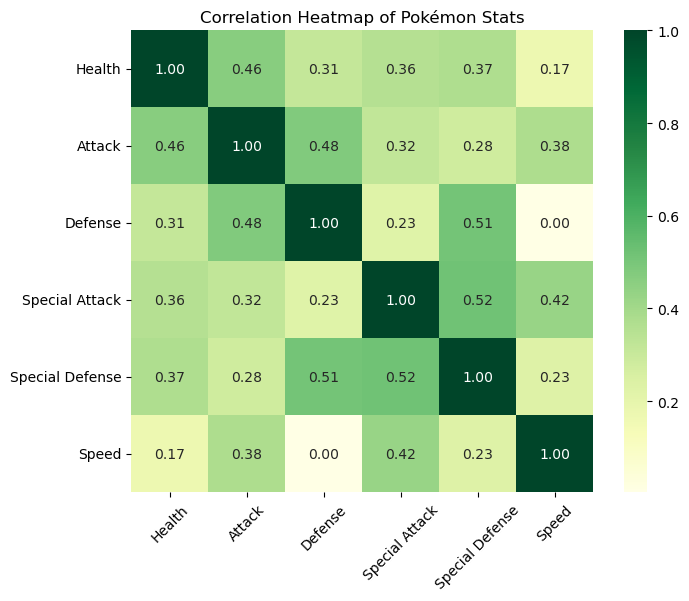

In [9]:
stat_cols = ['Health', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed']
corr = pokemon_db[stat_cols].corr()

plt.figure(figsize=(8, 6))
sb.heatmap(corr, annot=True, cmap='YlGn', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Pokémon Stats')
plt.xticks(rotation=45)
plt.show()

In [12]:
features = [
    'Primary Typing',
    'Secondary Typing',
    'Generation',
    'Evolution Stage',
    'Number of Evolution',
    'Base Stat Total',
    'Health', 'Attack', 'Defense',
    'Special Attack', 'Special Defense', 'Speed',
    'Height (in)', 'Weight (lbs)',
    'Catch Rate'
]

In [13]:
#stuff we're gonna feed the machine and what we're looking for
X = pokemon_db[features]
y = pokemon_db['Legendary Status']

#splitting up the cat and the numerical
categorical = ['Primary Typing', 'Secondary Typing', 'Generation']
numerical = list(set(features) - set(categorical))

#Turning the cat into numbers and scaling the numbers
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('num', StandardScaler(), numerical)
])

#putting everything into one machine, prepares the data, and then uses random
#forest to ask 100 mini trees if the pokemon is legendary
model = Pipeline([
    ('prep', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

#then we split it, 80% is what the machine learns from and 20% is
#what it tests to see if it learned anything
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


#test it
model.fit(X_train, y_train)

#results
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.98       197
        True       0.92      0.88      0.90        40

    accuracy                           0.97       237
   macro avg       0.95      0.93      0.94       237
weighted avg       0.97      0.97      0.97       237



# Out of 237 Pokemon 40 of them are going to be Legendary and 197 are not. It's a little rough at detecting the actual legendaries 



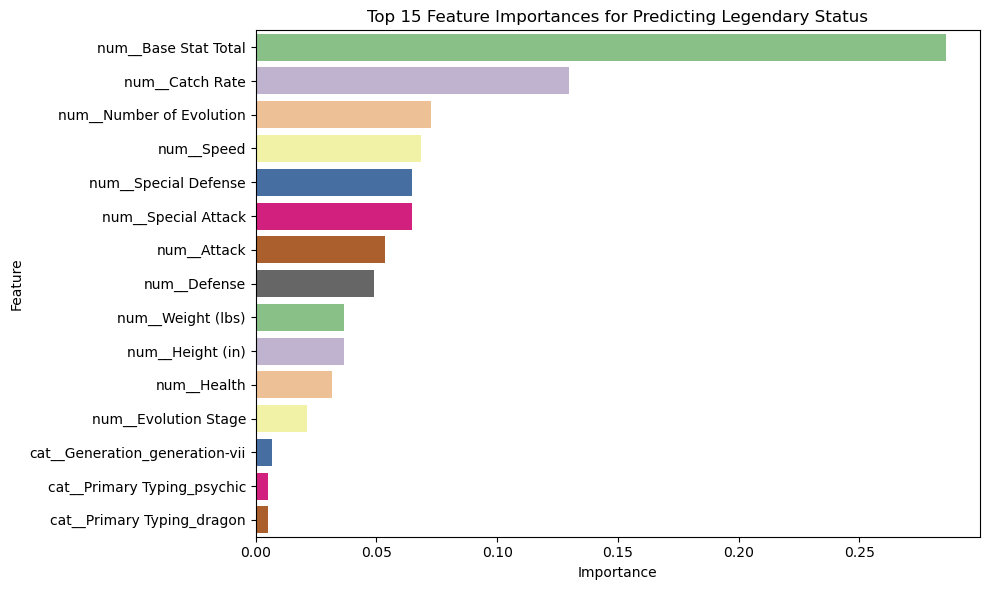

In [17]:
feature_names = model.named_steps['prep'].get_feature_names_out()
importances = model.named_steps['clf'].feature_importances_

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

top_features = importance_df.sort_values(by='Importance', ascending=False).head(15)

# Plot with seaborn
plt.figure(figsize=(10, 6))
sb.barplot(data=top_features, y='Feature', x='Importance', palette='Accent')
plt.title('Top 15 Feature Importances for Predicting Legendary Status')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()